___
# MINIPROJETO 1

## <font color='red'>COLOQUE AQUI SEU NOME</font>
___

## <font color='blue'>NOME DA VARIÁVEL QUANTITATIVA ESCOLHIDA</font>

___
### Itens 1 a 3 - Resolução:

In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib import axes as ax
import numpy as np
import math
import os 
from pandas.io import sql
from scipy import stats
from scipy.stats import dweibull
from scipy.stats import rv_continuous
from scipy.stats import norm


print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/home/moreira/Desktop/Gabriel/Insper/2°Semestre/Ciência dos Dados/Mini_projeto


In [2]:
data = pd.read_csv("weather.csv")
list(data)

['Day', 'JD', 'Month', 'State_id', 'Year', 'PRCP', 'TMAX', 'TMIN']

In [3]:
data.TMAX.describe()

/home/moreira/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    19858.000000
mean        58.121865
std         20.985585
min         -4.000000
25%               NaN
50%               NaN
75%               NaN
max        104.000000
Name: TMAX, dtype: float64

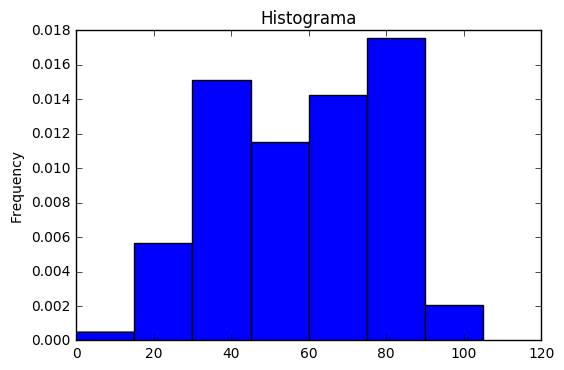

In [4]:
delta = 15
faixa = np.arange(0,110,delta)
faixa_T = pd.cut(data.TMAX,faixa)
plot = data.TMAX.plot.hist(bins = faixa, title='Histograma',normed=True)

### Primeira
Existe uma distribuição assimétrica à esquerda visto que a moda é menor que a mediana e a moda. Essa distribuição se assemelha a distribuição de Normal. 
### Segunda
O histograma acima também se assemelha com a distribuição dweibull, pelos mesmos motivos que se assemelha da distribuição anterior. Além disso, ela possui duas faixas em destaque, a terceira e a penultima, no caso.


### Previsão

#### Dweibull

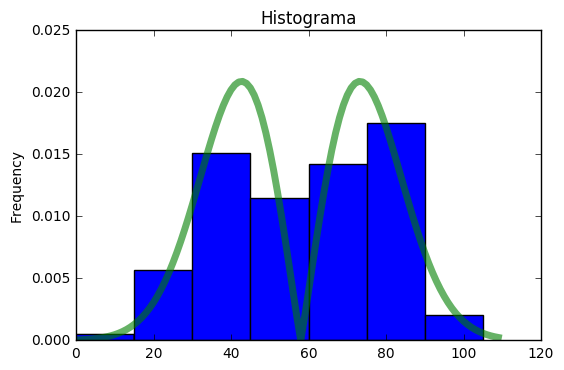

In [5]:
x = np.arange(0,110,1)
loc = 58
scale = 21
c = 2.07
f =  dweibull.pdf(x, c, loc, scale)
plot = data.TMAX.plot.hist(bins = faixa, title='Histograma',normed=1)
plt.plot(f, alpha = 0.6, lw = 5)
plt.show()


#### Normal

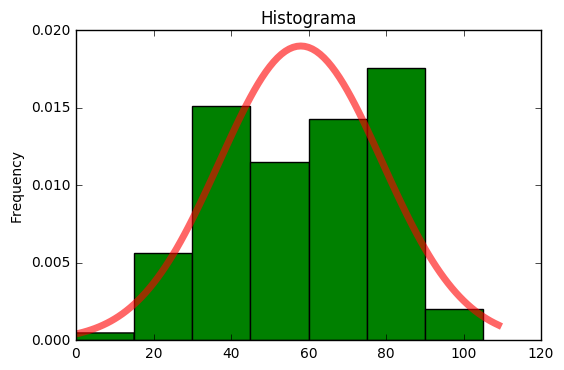

In [6]:
x = np.arange(0,110,1)
loc = 58
scale = 21
ab =   norm.pdf(x, loc, scale) 
plt.plot(ab, alpha = 0.6, lw = 5,color ='red')
plot = data.TMAX.plot.hist(bins = faixa, title='Histograma',normed=1,color = 'green')
plt.show()



### FIT

#### Dweibull

In [7]:
a = dweibull.fit(data.TMAX, c, loc=58, scale=21)
a

(1.7826638421245447, 56.510190284939554, 20.45558787319596)

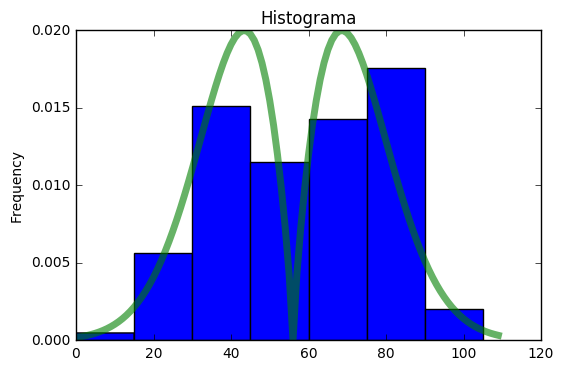

In [8]:
f =  dweibull.pdf(x, 1.78, 56, 20)
plot = data.TMAX.plot.hist(bins = faixa, title='Histograma',normed=1)
plt.plot(f, alpha = 0.6, lw = 5)
plt.show()

 #### normal

In [9]:
norm.fit(data.TMAX, loc=58, scale=21)

(nan, nan)

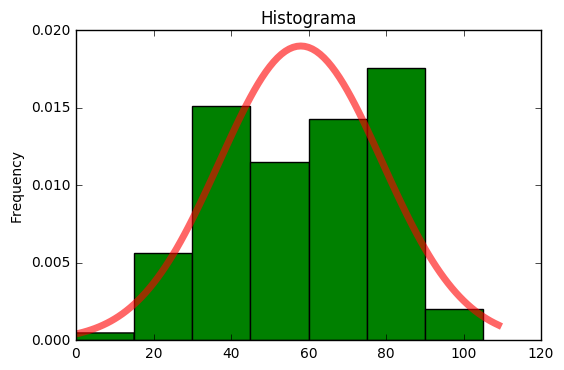

In [10]:
ab =  norm.pdf(x, 58, 21) 
plt.plot(ab, alpha = 0.6, lw = 5,color ='red')
plot = data.TMAX.plot.hist(bins = faixa, title='Histograma',normed=1,color = 'green')
plt.show()


####    Percebe-se que há muitas diferenças entre os modelos debatidos, porém é importante notar que independente do modelo de distribuição escolhidos, ele nunca será 100% fiel ao modelo real, seja qual foi a variável. Outra coisa importante: há uma maior fidelidade do modelo 'cru', ou seja, o modelo dweibull no qual não foi usado o stats.dweibull.fit, ele condiz mais com a realidade do que os outros estudados acima. 